### Project - Identify and Recommend Restaurants to Restaurant Consolidator

Domain: Marketing

Problem Statement
A restaurant consolidator is looking to revamp its B-to-C portal using intelligent automation tech. It is in search of different matrix to identify and recommend restaurants. To make sure an effective model can be achieved it is important to understand the behaviour of the data in hand.

## Import Liabraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [79]:
from wordcloud import WordCloud

## Import Dataset

In [80]:
data = pd.read_excel('/content/data.xlsx')

In [81]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


1.1 Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates cleaning variable names etc.Based on the findings from the previous questions identify duplicates and remove them.


In [82]:
data.shape

(9551, 19)

In [83]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

## 1.2 Based on the findings from the previous questions identify duplicates and remove them.

In [84]:
data.isnull().sum().sum()

10

<Axes: >

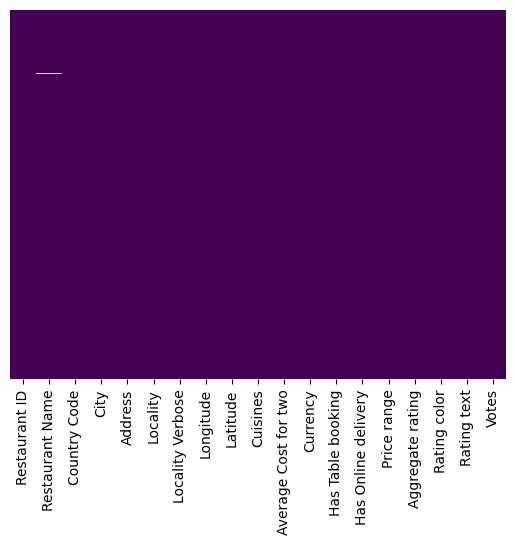

In [85]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [86]:
data1=data.dropna()

In [87]:
data1.shape

(9541, 19)

#### > In this dataset we have encountered 10 null values as the number of null values are less we can safely drop them.

In [88]:
duplicate=data1[data1.duplicated()]

In [89]:
duplicate

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes


#### > We havent encountered any duplicate values.

## Importing Country code file and Merging with existing dataset

In [90]:
Country = pd.read_excel('/content/Country_Code.xlsx')

In [91]:
Country.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


### Merge the file

In [92]:
data2 = pd.merge(data1, Country, on = 'Country Code', how = 'left')

In [93]:
data2.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


#### After merging the files country name column is added as last column

In [94]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9541 entries, 0 to 9540
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Price range           9541 non-null   int64  
 15  Aggregate rating     

In [95]:
data2.columns = data2.columns.str.replace(' ','_')
data2.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [96]:
data2.isnull().sum().sum()

0

## 2.1 Explore the geographical distribution of the restaurants, finding out the cities with maximum / minimum number of restaurants.

In [97]:
data2['Country'].value_counts()

,count
Country,
India,8651
United States,425
United Kingdom,80
South Africa,60
UAE,60
Brazil,60
New Zealand,40
Turkey,34
Australia,24


In [98]:
data2['City'].value_counts()


,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Consort,1
Lincoln,1
Monroe,1


#### > As we can observe that this data set contains high number of restaurants from India and Delhi have the highest number of restaurants.

## 2.2 Explore how ratings are distributed overall.

In [99]:
df = pd.DataFrame(data2)

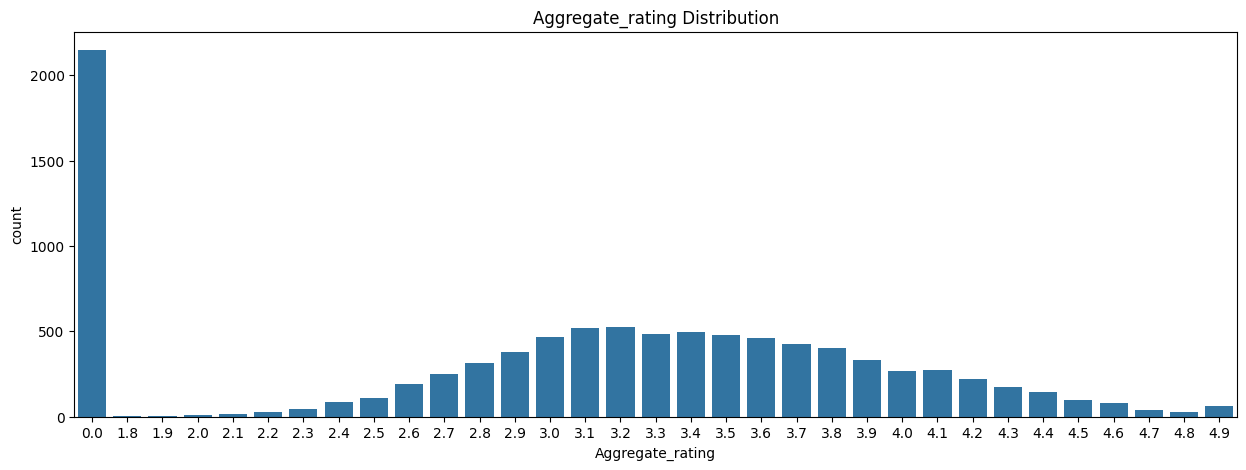

In [100]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Aggregate_rating', data=df)
plt.title('Aggregate_rating Distribution')
plt.show()


> As we can observe maximum number of customers havent rated restraunts as 0.0 is maximum. Where as per distribution the bell curve peaks at 3.2.

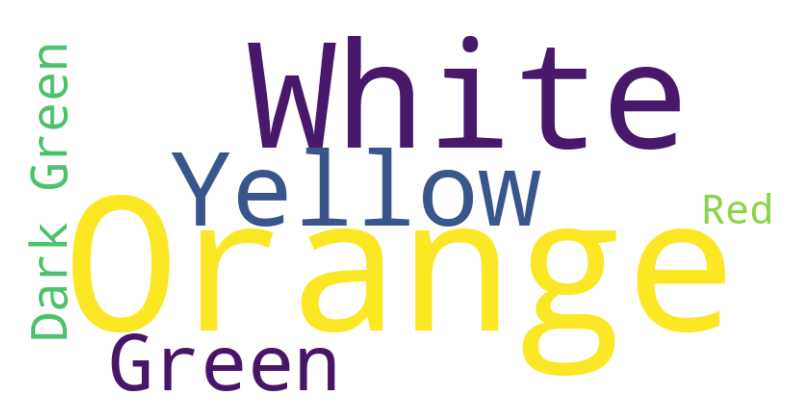

In [101]:
Color_counts = df['Rating_color'].value_counts()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Color_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axis
plt.show()

> As per word cloud Orange colour rating is in majority which means average customer isnt very pleased and White is second in rank which means a lot of them havent rated.

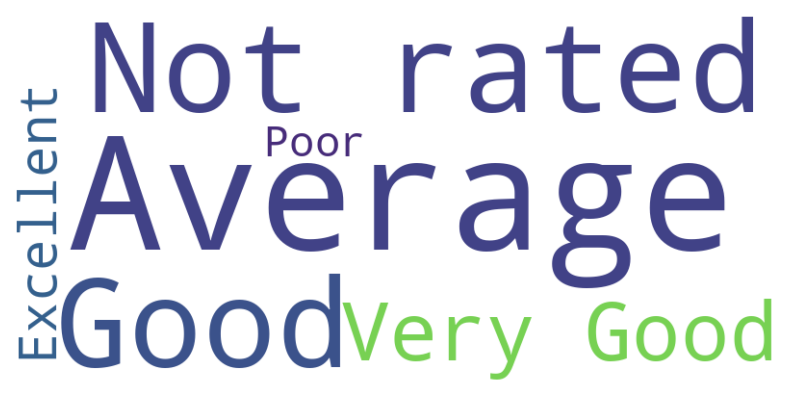

In [102]:
Text_counts = df['Rating_text'].value_counts()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Text_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axis
plt.show()

 > As we can see most of the rating is Average

## 2.3 Restaurant franchise is a thriving venture. So, it becomes very important to explore the franchise with most national presence.

In [103]:
Franchise = data2.groupby(['Restaurant_Name']).agg(Count = ('City','count')).reset_index()
Franchise

,Restaurant_Name,Count
0,12212,1
1,Let's Burrrp,1
2,#45,1
3,#Dilliwaala6,1
4,#InstaFreeze,1
...,...,...
7431,t Lounge by Dilmah,1
7432,tashas,1
7433,wagamama,1
7434,{Niche} - Cafe & Bar,1


In [104]:
Franchise_Most = Franchise.sort_values(by = 'Count',ascending=False).reset_index(drop=True)
Franchise_Most

,Restaurant_Name,Count
0,Cafe Coffee Day,83
1,Domino's Pizza,79
2,Subway,63
3,Green Chick Chop,51
4,McDonald's,48
...,...,...
7431,Ghar Ki Handi,1
7432,Ghar Ka Swad,1
7433,Ghar Bistro Cafe,1
7434,Ghalib Kabab Corner,1


## 2.4 What is the ratio between restaurants that allow table booking vs that do not allow table booking

In [105]:
## Ratio between restaurants that allow table booking vs. those that do not allow table booking
Booking_table=data2.groupby('Has_Table_booking').Restaurant_ID.count()
Booking_table

,Restaurant_ID
Has_Table_booking,
No,8383
Yes,1158


In [106]:
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking:',
      round((Booking_table.Yes/Booking_table.No),2))

Ratio between restaurants that allow table booking vs. those that do not allow table booking: 0.14


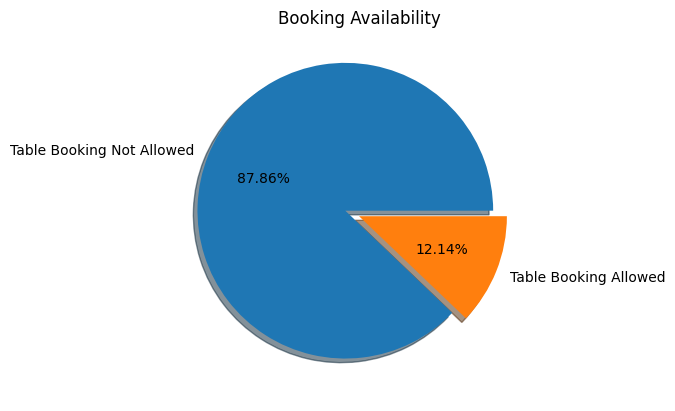

In [107]:
# Graphical representation of above ration - Pie Chart
plt.title('Booking Availability')
plt.pie(Booking_table,labels=('Table Booking Not Allowed','Table Booking Allowed'),explode=(0.1,0),shadow=True,
        autopct='%1.2f%%')
plt.show()

### We can see in above graph only 12.14% restaurants allow table booking and 87.86 restaurants not allow table booking

## 2.5 What is the percentage of restaurants providing online delivery

In [108]:
online_delivery=data2.groupby('Has_Online_delivery').Restaurant_ID.count()
online_delivery

,Restaurant_ID
Has_Online_delivery,
No,7090
Yes,2451


In [109]:
print('Percentage of restaurants providing online delivery:', round((online_delivery.Yes/online_delivery.sum()),4)*100)

Percentage of restaurants providing online delivery: 25.69


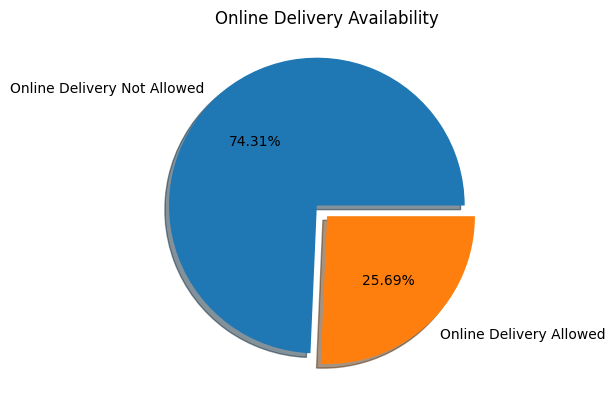

In [110]:
# Graphical representation via Pie Chart
plt.title('Online Delivery Availability')
plt.pie(online_delivery,labels=('Online Delivery Not Allowed','Online Delivery Allowed'),explode=(0.1,0),shadow=True,
        autopct='%1.2f%%')
plt.show()

### > We can see in above graph only 25.69% restaurants provide online delivery and 74.31 restaurants not provide online delivery

## 2.6 Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t

In [111]:
Votes = data2.groupby(['Has_Online_delivery']).sum('Votes')
Votes

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
Has_Online_delivery,,,,,,,,
No,67227164919,165050,425144.965008,177803.058272,9789377,12502,17464.7,977236
Yes,19063894933,8415,188094.559079,68820.590044,1663335,4718,7962.9,517914


In [112]:
Votes = Votes.drop(['Restaurant_ID','Country_Code','Longitude','Latitude','Average_Cost_for_two',
                                          'Price_range','Aggregate_rating'], axis = 1)
Votes

,Votes
Has_Online_delivery,
No,977236
Yes,517914


In [113]:
difference_in_votes = Votes.iloc[0]['Votes'] - Votes.iloc[1]['Votes']
print("The difference in number of votes for the restaurants that deliver and the restaurants that do not deliver:= " ,difference_in_votes)

The difference in number of votes for the restaurants that deliver and the restaurants that do not deliver:=  459322


### As we can see above there is difference of 459322 votes between Yes and No for online delivery

## 2.7 What are the top 10 cuisines served across cities

In [114]:
data2.groupby("Restaurant_Name")["Cuisines"].max().value_counts().head(10)

,count
Cuisines,
North Indian,818
"North Indian, Chinese",438
Chinese,281
Fast Food,263
"North Indian, Mughlai",254
Bakery,183
"North Indian, Mughlai, Chinese",176
"Bakery, Desserts",154
Street Food,137


### Based on above information we can say that North Indian cuisine is at number 1 and and no2. is chinese

## 2.8 What is the maximum and minimum no. of cuisines that a restaurant serves? Also, what is the relationship between No. of cuisines served and Ratings

In [115]:
Max_Min_Cuisines = data2.groupby(['Restaurant_Name','Cuisines']).agg( Count = ('Cuisines','count')).reset_index()
Max_Min_Cuisines = Max_Min_Cuisines.sort_values(by = 'Count', ascending = False).reset_index(drop=True)
Max_Min_Cuisines.rename(columns={'Count':'Restaurant_Count'}, inplace=True)
Max_Min_Cuisines

,Restaurant_Name,Cuisines,Restaurant_Count
0,Cafe Coffee Day,Cafe,83
1,Domino's Pizza,"Pizza, Fast Food",78
2,Subway,"American, Fast Food, Salad, Healthy Food",62
3,Green Chick Chop,"Raw Meats, North Indian, Fast Food",47
4,McDonald's,"Fast Food, Burger",44
...,...,...,...
7934,Fusilli Reasons,Italian,1
7935,Funkey Monkey,"Breakfast, Coffee and Tea",1
7936,Funk House Cafe,"Cafe, Italian, Salad",1
7937,Funduz Cafe,Fast Food,1


In [116]:
Max_Min_Cuisines=pd.DataFrame(data2.groupby('Restaurant_Name').Cuisines.count()).reset_index()
Max_Min_Cuisines.sort_values(by = 'Cuisines', ascending = False)

,Restaurant_Name,Cuisines
1098,Cafe Coffee Day,83
2096,Domino's Pizza,79
6097,Subway,63
2713,Green Chick Chop,51
4069,McDonald's,48
...,...,...
2613,Ghar Ki Handi,1
2612,Ghar Ka Swad,1
2610,Ghar Bistro Cafe,1
2609,Ghalib Kabab Corner,1


### > Based on above information we can say that Caffee day is highest cuisines served which is 83 and Least cusines serve by restaurants count is 1

In [117]:
data3=data2["Cuisines"].value_counts()
data3

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
...,...
"Continental, Mexican, North Indian, Chinese",1
"Cafe, Mexican, Italian, Continental",1
"Cafe, Continental, Italian, Street Food",1


In [118]:
data2["No_of_cuisines"]=data1["Cuisines"].str.strip().str.split(',').apply(len)
data2.head(5)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,No_of_cuisines
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia,2.0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,3.0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia,2.0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia,1.0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia,2.0


In [119]:
data2["No_of_cuisines"]

,No_of_cuisines
0,2.0
1,3.0
2,2.0
3,1.0
4,2.0
...,...
9536,2.0
9537,1.0
9538,3.0
9539,NaN


<Axes: xlabel='No_of_cuisines', ylabel='Aggregate_rating'>

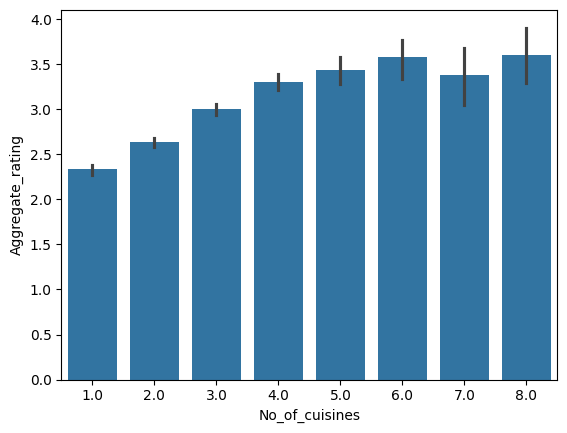

In [120]:
sns.barplot(data2, x="No_of_cuisines", y="Aggregate_rating")

<Axes: xlabel='No_of_cuisines', ylabel='Aggregate_rating'>

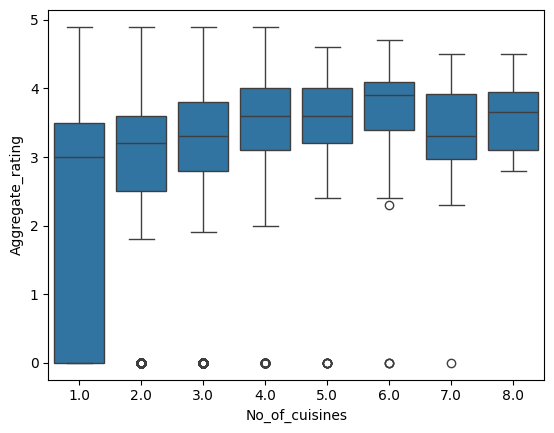

In [121]:
sns.boxplot(data2, x="No_of_cuisines", y="Aggregate_rating")

### From above chart we can say that restaurant which serve more cuisines they get more ratings

## 2.9 Discuss the cost vs the other variables

In [122]:
# Currency wise distribution of cost
Currency_dis = pd.DataFrame(data2.groupby('Currency').Average_Cost_for_two.count()).reset_index()
Currency_dis.sort_values(by='Average_Cost_for_two', ascending = False)

,Currency,Average_Cost_for_two
4,Indian Rupees(Rs.),8651
2,Dollar($),473
7,Pounds(å£),80
1,Brazilian Real(R$),60
3,Emirati Diram(AED),60
9,Rand(R),60
6,NewZealand($),40
11,Turkish Lira(TL),34
0,Botswana Pula(P),22
5,Indonesian Rupiah(IDR),21


In [123]:
##  Distribution cost accross the restaurants
Cost_per_restaurants = pd.DataFrame(data2.groupby('Restaurant_Name').Average_Cost_for_two.sum()).reset_index()
Cost_per_restaurants.sort_values(by = 'Average_Cost_for_two', ascending = False)

,Restaurant_Name,Average_Cost_for_two
5889,Skye,800000
5586,Satoo - Hotel Shangri-La,800000
6254,Talaga Sampireun,600000
6162,Sushi Masa,500000
41,3 Wise Monkeys,450000
...,...,...
1911,Deena Chat Bhandar,0
6683,The Latitude - Radisson Blu,0
7087,UrbanCrave,0
5401,Royal Hotel,0


In [124]:
# Restaurants wise distribution of cost - by Currencies
data3=pd.DataFrame(data2.groupby(['Currency','Restaurant_Name']).agg(Count = ('Average_Cost_for_two','sum'))).reset_index()
data3.sort_values(by='Count', ascending = False)

,Currency,Restaurant_Name,Count
7211,Indonesian Rupiah(IDR),Skye,800000
7210,Indonesian Rupiah(IDR),Satoo - Hotel Shangri-La,800000
7213,Indonesian Rupiah(IDR),Talaga Sampireun,600000
7212,Indonesian Rupiah(IDR),Sushi Masa,500000
7199,Indonesian Rupiah(IDR),3 Wise Monkeys,450000
...,...,...,...
5682,Indian Rupees(Rs.),Sheroes Hangout,0
1046,Indian Rupees(Rs.),Atmosphere Grill Cafe Sheesha,0
6549,Indian Rupees(Rs.),The Latitude - Radisson Blu,0
427,Dollar($),Senor Iguanas,0


In [125]:
data3.groupby(['Currency'], sort=False)['Count'].max()

,Count
Currency,
Botswana Pula(P),6000
Brazilian Real(R$),460
Dollar($),500
Emirati Diram(AED),750
Indian Rupees(Rs.),55300
Indonesian Rupiah(IDR),800000
NewZealand($),200
Pounds(å£),230
Qatari Rial(QR),550


In [126]:
# Currency wise highest cost accross restaurants
Max_cost=data3.groupby('Currency')\
  .apply(lambda group: group[group.Count == group.Count.max()])\
  .reset_index(drop=True)
Max_cost.sort_values(by='Count', ascending = False)

<ipython-input-126-ecf7dd78b904>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group[group.Count == group.Count.max()])\


,Currency,Restaurant_Name,Count
5,Indonesian Rupiah(IDR),Satoo - Hotel Shangri-La,800000
6,Indonesian Rupiah(IDR),Skye,800000
4,Indian Rupees(Rs.),Domino's Pizza,55300
0,Botswana Pula(P),Spiral - Sofitel Philippine Plaza Manila,6000
11,Sri Lankan Rupee(LKR),The Manhattan Fish Market,4500
10,Rand(R),Restaurant Mosaic @ The Orient,3210
3,Emirati Diram(AED),Applebee's,750
9,Qatari Rial(QR),Vine - The St. Regis,550
2,Dollar($),Restaurant Andre,500
1,Brazilian Real(R$),Coco Bambu,460


### > Based on above codes we can say that Satoo and Skye have highest cost across all the restaurants. Satoo restaurant have highest cost in Indonesain currency and Domino's Pizza have highest cost in indian rupees.

## 2.10 Explain the factors in the data that may have an effect on ratings e.g. No. of cuisines, cost, delivery option etc.

In [127]:
## Aggregate_rating vs count
Rating_count=pd.DataFrame(data2.groupby('Aggregate_rating').agg(Count = ('Restaurant_Name','count'))).reset_index()
Rating_count.sort_values(by='Aggregate_rating', ascending = False)

,Aggregate_rating,Count
32,4.9,61
31,4.8,25
30,4.7,41
29,4.6,78
28,4.5,95
27,4.4,143
26,4.3,174
25,4.2,221
24,4.1,273
23,4.0,266


### > From above observation we can say that 61 restaurants have 4.9 ratings and 2148 restaurants have 0 ratings

In [128]:
Country_Rating=pd.DataFrame(data2.groupby(['Country','Aggregate_rating']).agg(Count =
                                                                               ('Restaurant_Name','count'))).reset_index()
Country_Rating.sort_values(by='Aggregate_rating', ascending = False)

,Country,Aggregate_rating,Count
221,United States,4.9,14
92,New Zealand,4.9,2
139,South Africa,4.9,3
151,Sri Lanka,4.9,1
32,Brazil,4.9,3
...,...,...,...
38,India,1.8,1
200,United States,0.0,3
12,Brazil,0.0,5
180,United Kingdom,0.0,1


In [129]:
# Best rated restaurants by country
Country_wise_top_rating=pd.DataFrame(Country_Rating[Country_Rating.Aggregate_rating >= 4.9]).reset_index()
Country_wise_top_rating.sort_values(by='Count', ascending = False)

,index,Country,Aggregate_rating,Count
1,69,India,4.9,19
11,221,United States,4.9,14
2,79,Indonesia,4.9,4
9,179,UAE,4.9,4
10,199,United Kingdom,4.9,4
0,32,Brazil,4.9,3
4,101,Phillipines,4.9,3
6,139,South Africa,4.9,3
8,163,Turkey,4.9,3
3,92,New Zealand,4.9,2


### > India have 19 counts for highest rating post that United states have 14 count for highest rating.

In [130]:
### Rating Distribution
RatingType_count=pd.DataFrame(data2.groupby('Rating_text').agg(Count = ('Restaurant_Name','count'))).reset_index()
RatingType_count

,Rating_text,Count
0,Average,3734
1,Excellent,300
2,Good,2096
3,Not rated,2148
4,Poor,186
5,Very Good,1077


### >  From above observation we can say that Average rating count is higher which is 3734, Not Rated rating count is 2148 and Good Rating count is 2096

In [131]:
Country_RatingType_count=pd.DataFrame(data2.groupby(['Country','Rating_text']).agg(Count = ('Restaurant_Name','count'))).reset_index()
Country_RatingType_count

,Country,Rating_text,Count
0,Australia,Average,4
1,Australia,Excellent,1
2,Australia,Good,13
3,Australia,Poor,1
4,Australia,Very Good,5
...,...,...,...
61,United States,Excellent,67
62,United States,Good,155
63,United States,Not rated,3
64,United States,Poor,2


In [132]:
Country_wise_ratingType=pd.DataFrame(Country_RatingType_count[Country_RatingType_count.Rating_text =='Excellent']).reset_index()
Country_wise_ratingType.sort_values(by='Count', ascending = False)

,index,Country,Rating_text,Count
2,14,India,Excellent,116
12,61,United States,Excellent,67
11,56,United Kingdom,Excellent,23
10,51,UAE,Excellent,18
1,6,Brazil,Excellent,16
4,23,New Zealand,Excellent,12
5,27,Phillipines,Excellent,12
7,38,South Africa,Excellent,12
9,47,Turkey,Excellent,10
3,20,Indonesia,Excellent,7


### > Based on above observation we can say that India have 116 count for excellent rating post that United states have 67 excelllent rating,Austrailia have only 1 excellent rating count